# ROMS-TOOLS setup for Iceland0_MARBL_2024

First step is to set up the outer grid using ROMS-TOOLS and save the grid file.

In [1]:
import xarray as xr
from roms_tools import Grid

In [2]:
project='/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/'
datasets='/anvil/projects/x-ees250129/Datasets/'
model_name='Iceland0'
child_name='Iceland1'
grid_path='/anvil/projects/x-ees250129/x-uheede/MATLAB/setup_s2r_phys+bgc/1.Make_grid/Iceland0_grid_MAT.nc'

In [3]:
#%%time

#grid = Grid(
#    nx=512,  # number of grid points in x-direction
#    ny=512,  # number of grid points in y-direction
#    size_x=1280,  # domain size in x-direction (in km)
#    size_y=1280,  # domain size in y-direction (in km)
#    center_lon=-25,  # longitude of the center of the domain
#    center_lat=63,  # latitude of the center of the domain
#    rot=-20,  # rotation of the grid (in degrees)
#    topography_source={
#        "name": "SRTM15",
#        "path":datasets+"SRTM15/SRTM15_V2.6.nc"},
#    N=100,  # number of vertical layers
#    verbose=True,
#)

In [4]:
grid = Grid.from_file(grid_path)

2025-11-20 13:00:02 - WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
2025-11-20 13:00:02 - INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
2025-11-20 13:00:02 - INFO - Total time: 0.004 seconds
2025-11-20 13:00:02 - INFO - ================================================================================================


In [5]:
grid.update_vertical_coordinate(N=60, theta_s=5.0, theta_b=2.0, hc=300.0, verbose=False)

In [6]:
grid.ds

<xarray.Dataset> Size: 31MB
Dimensions:       (one: 1, eta_rho: 514, xi_rho: 514, xi_u: 513, eta_v: 513,
                   eta_coarse: 258, xi_coarse: 258, s_rho: 60, s_w: 61)
Coordinates:
    lon_rho       (eta_rho, xi_rho) float64 2MB ...
    lat_rho       (eta_rho, xi_rho) float64 2MB ...
    lat_u         (eta_rho, xi_u) float64 2MB 58.73 58.73 58.73 ... 65.43 65.41
    lon_u         (eta_rho, xi_u) float64 2MB 320.7 320.8 320.8 ... 352.9 352.9
    lat_v         (eta_v, xi_rho) float64 2MB 58.74 58.74 58.74 ... 65.41 65.4
    lon_v         (eta_v, xi_rho) float64 2MB 320.7 320.7 320.8 ... 352.9 352.9
    lat_coarse    (eta_coarse, xi_coarse) float64 533kB 58.72 58.72 ... 65.41
    lon_coarse    (eta_coarse, xi_coarse) float64 533kB 320.7 320.8 ... 353.0
Dimensions without coordinates: one, eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/20)
    spherical     (one) |S1 1B ...
    angle         (eta_rho, xi_rho) float64 2MB ...
    h             (eta_rho, xi_rho) float64 2MB ...
    hraw          (eta_rho, xi_rho) float64 2MB ...
    f             (eta_rho, xi_rho) float64 2MB ...
    pm            (eta_rho, xi_rho) float64 2MB ...
    ...            ...
    angle_coarse  (eta_coarse, xi_coarse) float64 533kB -0.1261 ... -0.6262
    mask_coarse   (eta_coarse, xi_coarse) int32 266kB 1 1 1 1 1 1 ... 1 1 1 1 1
    sigma_r       (s_rho) float32 240B -0.9917 -0.975 ... -0.025 -0.008333
    Cs_r          (s_rho) float32 240B -0.9865 -0.9579 ... -0.0002471 -2.743e-05
    sigma_w       (s_w) float32 244B -1.0 -0.9833 -0.9667 ... -0.01667 0.0
    Cs_w          (s_w) float32 244B -1.0 -0.9725 -0.9429 ... -0.0001098 0.0
Attributes:
    Title:     ROMS grid by Easy Grid. Settings: nx: 512 ny: 512 xsize: 1280 ...
    Date:      14-Oct-2025
    Type:      ROMS grid produced by Easy Grid
    straddle:  False
    theta_s:   5.0
    theta_b:   2.0
    hc:        300.0

In [7]:
#mat_grid['h'].plot()

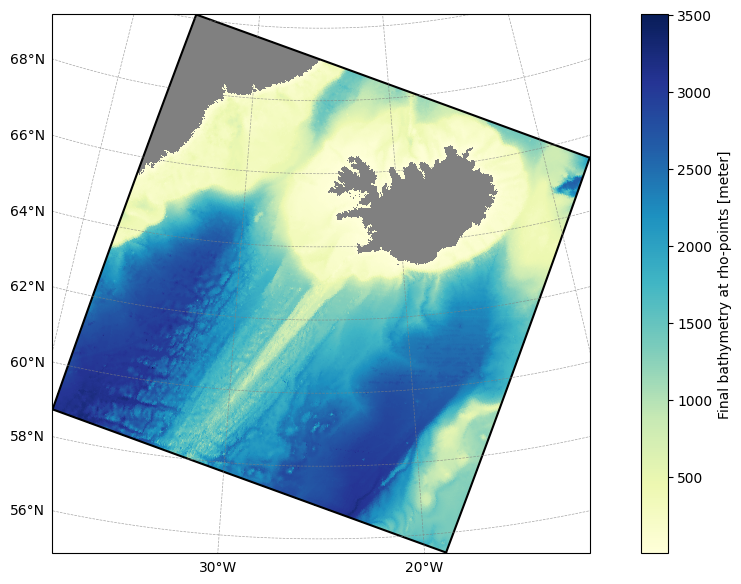

In [8]:
grid.plot()


In [9]:
filepath = project+model_name+'_grid_60.nc'
yaml_filepath=project+model_name+'_grid_60.yaml'

In [10]:
grid.save(filepath)

2025-11-20 13:00:03 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_grid_60.nc


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_grid_60.nc')]

In [11]:
grid.to_yaml(yaml_filepath)

In [12]:
tpxo_path = datasets+"TPXO/TPXO10.v2/"
tpxo_dict = {
    "grid": tpxo_path + "grid_tpxo10v2.nc",
    "h": tpxo_path + "h_tpxo10.v2.nc",
    "u": tpxo_path + "u_tpxo10.v2.nc",
}

Next, we set up tidal forcing:

In [13]:
from roms_tools import TidalForcing

In [14]:
from datetime import datetime

In [15]:
model_reference_date = datetime(2000, 1, 1)

In [16]:

tidal_forcing = TidalForcing(
    grid=grid,
    source={"name": "TPXO", "path": tpxo_dict},
    ntides=15,  # Number of constituents to consider <= 15. Default is 10.
    model_reference_date=model_reference_date,  # Model reference date. Default is January 1, 2000.
    use_dask=True
)

In [17]:
filepath = project+model_name+"_tides.nc"

In [18]:
%time tidal_forcing.save(filepath)

2025-11-20 13:00:08 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_tides.nc


[########################################] | 100% Completed | 7.18 sms
CPU times: user 3min 4s, sys: 1.58 s, total: 3min 5s
Wall time: 7.35 s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_tides.nc')]

For the surface forcing, we use ERA5 plus the unified BGC dataset

In [19]:
from roms_tools import Grid, SurfaceForcing

In [20]:
start_time = datetime(2024, 1, 1)
end_time = datetime(2024, 6, 1)
start_time1 = datetime(2024, 6, 1)
end_time1 = datetime(2024, 12, 1)

In [21]:
surface_forcing_kwargs = {
    "grid": grid,
    "start_time": start_time,
    "end_time": end_time,
    "type": "physics",
    "model_reference_date": datetime(2000, 1, 1), # this is the default
}

In [22]:
surface_forcing_kwargs1 = {
    "grid": grid,
    "start_time": start_time1,
    "end_time": end_time1,
    "type": "physics",
    "model_reference_date": datetime(2000, 1, 1), # this is the default
}

In [23]:
%%time

surface_forcing = SurfaceForcing(
    **surface_forcing_kwargs,
    source={"name": "ERA5"},
    use_dask=True,
)

2025-11-20 13:00:16 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
2025-11-20 13:02:02 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.


CPU times: user 4min 40s, sys: 8.72 s, total: 4min 48s
Wall time: 2min 46s


In [24]:
%%time

surface_forcing1 = SurfaceForcing(
    **surface_forcing_kwargs1,
    source={"name": "ERA5"},
    use_dask=True,
)

2025-11-20 13:03:02 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
2025-11-20 13:04:54 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.


CPU times: user 3min 12s, sys: 7.63 s, total: 3min 20s
Wall time: 2min 55s


[########################################] | 100% Completed | 404.59 ms


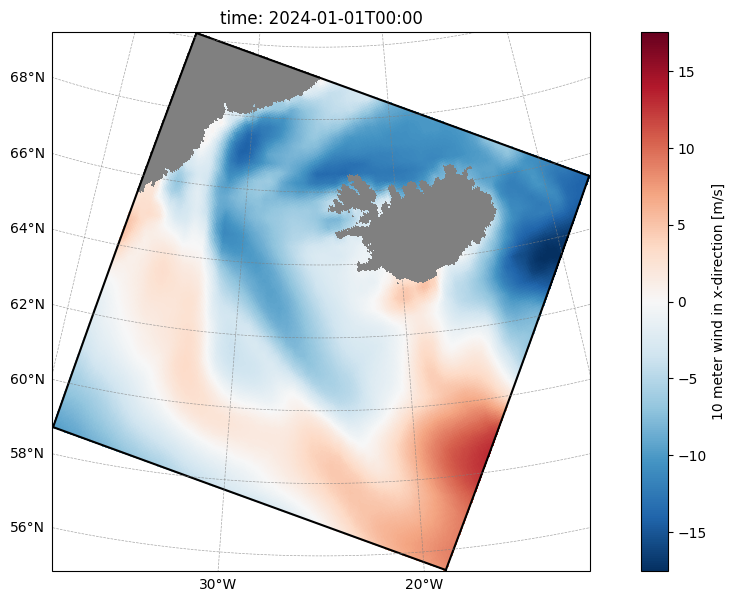

In [25]:
surface_forcing.plot("uwnd", time=0)

In [26]:
#cesm_bgc_path = "/global/cfs/projectdirs/m4746/Datasets/CESM_REGRIDDED/CESM-surface_lowres_regridded.nc"
unified_bgc_path = datasets+"UNIFIED/BGCdataset.nc"

In [27]:
%%time

unified_bgc_surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": unified_bgc_path, "climatology": True},
    type="bgc",
    use_dask=True,
)

2025-11-20 13:06:02 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bgc.opt` ROMS option file.


CPU times: user 138 ms, sys: 10.9 ms, total: 149 ms
Wall time: 500 ms


In [28]:
filepath = project+model_name+"_surface_forcing2024.nc"

In [29]:
filepath1 = project+model_name+"_surface_forcing2024.nc"

In [30]:
%time surface_forcing.save(filepath)

2025-11-20 13:06:04 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202401.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202402.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202403.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202404.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202405.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202406.nc


[########################################] | 100% Completed | 162.15 s
[########################################] | 100% Completed | 145.96 s
[########################################] | 100% Completed | 170.19 s
[########################################] | 100% Completed | 192.96 s
[########################################] | 100% Completed | 192.20 s
[########################################] | 100% Completed | 517.91 ms
CPU times: user 6h 3min 30s, sys: 2min 28s, total: 6h 5min 59s
Wall time: 15min 40s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202401.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202402.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202403.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202404.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202405.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202406.nc')]

In [31]:
%time surface_forcing1.save(filepath1)

2025-11-20 13:21:45 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202406.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202407.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202408.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202409.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202410.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202411.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202412.nc


[########################################] | 100% Completed | 195.17 s
[########################################] | 100% Completed | 199.92 s
[########################################] | 100% Completed | 214.15 s
[########################################] | 100% Completed | 203.79 s
[########################################] | 100% Completed | 160.58 s
[########################################] | 100% Completed | 156.47 s
[########################################] | 100% Completed | 408.13 ms
CPU times: user 7h 39min 27s, sys: 3min 3s, total: 7h 42min 31s
Wall time: 20min 21s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202406.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202407.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202408.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202409.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202410.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202411.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_surface_forcing2024_202412.nc')]

In [32]:
filepath = project+model_name+"_bgc_surface_forcing.nc"

In [33]:
%time unified_bgc_surface_forcing.save(filepath)

2025-11-20 13:42:04 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_bgc_surface_forcing_clim.nc


[########################################] | 100% Completed | 302.94 ms
CPU times: user 211 ms, sys: 11.9 ms, total: 223 ms
Wall time: 840 ms


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_bgc_surface_forcing_clim.nc')]

Next we generate the initial file

In [34]:
from roms_tools import Grid, InitialConditions

In [35]:
from datetime import datetime

In [36]:
ini_time = datetime(2024, 1, 5)

In [37]:
path = datasets+"GLORYS/ICELAND_DOMAIN/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-05_no_depth_zos.nc"

In [38]:
%%time

initial_conditions_with_unified_bgc = InitialConditions(
    grid=grid,
    ini_time=ini_time,
    source={"name": "GLORYS", "path": path},
    bgc_source={
        "name": "UNIFIED",
        "path": unified_bgc_path,
        "climatology": True,
    },  # bgc_source is optional
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)

2025-11-20 13:42:05 - INFO - Sea surface height will NOT be used to adjust depth coordinates.


CPU times: user 1min 20s, sys: 31.7 s, total: 1min 52s
Wall time: 10.9 s


In [39]:
filepath = project+model_name+"_initial_conditions_60m.nc"

In [40]:
%time initial_conditions_with_unified_bgc.save(filepath)

2025-11-20 13:42:16 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_initial_conditions_60m.nc


[########################################] | 100% Completed | 131.41 s
CPU times: user 25min 33s, sys: 5min 44s, total: 31min 17s
Wall time: 2min 13s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_initial_conditions_60m.nc')]

In [41]:
glorys_path = [
    datasets+"/GLORYS/ICELAND_DOMAIN/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-*_no_depth_zos.nc"]

In [42]:
#glorys_path = [
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-04_no_depth_zos.nc",  # include data from day before start time
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-05_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-06_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-07_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-08_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-09_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-10_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-11_no_depth_zos.nc",  # include data from day after end time
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-12_no_depth_zos.nc", 
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-13_no_depth_zos.nc", 
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-14_no_depth_zos.nc",  # include data from day before start time
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-15_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-16_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-17_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-18_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-19_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-20_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-21_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-22_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-23_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-24_no_depth_zos.nc",  # include data from day before start time
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-25_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-26_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-27_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-28_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-29_no_depth_zos.nc",
#    "/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-30_no_depth_zos.nc",
#    #"/global/cfs/cdirs/m4632/uheede/GLORYS/2024/cmems_mod_glo_phy_myint_0.083deg_P1D-m_multi-vars_52.50W-2.67E_44.33N-74.42N_1.54-3992.48m_2024-01-31_no_depth_zos.nc"
#]

In [43]:
from roms_tools import Grid, BoundaryForcing

In [44]:
start_time = datetime(2024, 1, 1)
end_time = datetime(2024, 6, 30)

In [45]:
start_time1 = datetime(2024, 6, 1)
end_time1 = datetime(2024, 12, 30)

In [46]:
%%time

boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    boundaries={
        "south": True,
        "east": True,
        "north": True,  
        "west": True,
    },
    source={"name": "GLORYS", "path": glorys_path},
    type="physics",  # "physics" or "bgc"; default is "physics"
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)

2025-11-20 13:44:29 - INFO - Sea surface height will NOT be used to adjust depth coordinates.


CPU times: user 9.49 s, sys: 2.57 s, total: 12.1 s
Wall time: 4min 50s


In [47]:
%%time

boundary_forcing1 = BoundaryForcing(
    grid=grid,
    start_time=start_time1,
    end_time=end_time1,
    boundaries={
        "south": True,
        "east": True,
        "north": True,  
        "west": True,
    },
    source={"name": "GLORYS", "path": glorys_path},
    type="physics",  # "physics" or "bgc"; default is "physics"
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)

2025-11-20 13:49:20 - INFO - Sea surface height will NOT be used to adjust depth coordinates.
2025-11-20 13:54:39 - WARNING - No records found at or after the end_time: 2024-12-30 00:00:00.


CPU times: user 12 s, sys: 2.63 s, total: 14.6 s
Wall time: 5min 25s


In [48]:
%%time

unified_bgc_boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    boundaries={
        "south": True,
        "east": True,
        "north": True,  
        "west": True,
    },
    source={"name": "UNIFIED", "path": unified_bgc_path, "climatology": True},
    type="bgc",
    use_dask=True,
)

2025-11-20 13:54:46 - INFO - Sea surface height will NOT be used to adjust depth coordinates.


CPU times: user 5.44 s, sys: 69.7 ms, total: 5.51 s
Wall time: 6.4 s


In [49]:
filepath = project+model_name+"_bgc_boundary_forcing_2024.nc"
%time unified_bgc_boundary_forcing.save(filepath)


2025-11-20 13:54:52 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_bgc_boundary_forcing_2024_clim.nc


[########################################] | 100% Completed | 98.60 s
CPU times: user 1min 4s, sys: 13.9 s, total: 1min 18s
Wall time: 1min 40s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_bgc_boundary_forcing_2024_clim.nc')]

In [50]:
filepath = project+model_name+"_boundary_forcing_2024.nc"
%time boundary_forcing.save(filepath, group=True)

2025-11-20 13:56:33 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202401.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202402.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202403.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202404.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202405.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202406.nc


[########################################] | 100% Completed | 48.10 s
[########################################] | 100% Completed | 37.60 s
[########################################] | 100% Completed | 37.16 s
[########################################] | 100% Completed | 16.34 s
[########################################] | 100% Completed | 20.15 s
[########################################] | 100% Completed | 39.81 s
CPU times: user 1min 57s, sys: 16.3 s, total: 2min 13s
Wall time: 3min 28s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202401.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202402.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202403.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202404.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202405.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202406.nc')]

In [51]:
filepath = project+model_name+"_boundary_forcing_2024.nc"
%time boundary_forcing1.save(filepath, group=True)

2025-11-20 14:00:01 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202406.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202407.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202408.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202409.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202410.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202411.nc


[########################################] | 100% Completed | 7.96 ss
[########################################] | 100% Completed | 40.85 s
[########################################] | 100% Completed | 37.37 s
[########################################] | 100% Completed | 37.26 s
[########################################] | 100% Completed | 40.04 s
[########################################] | 100% Completed | 41.67 s
CPU times: user 2min 2s, sys: 15.8 s, total: 2min 18s
Wall time: 3min 33s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202406.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202407.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202408.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202409.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202410.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland0_MARBL_2024/Iceland0_boundary_forcing_2024_202411.nc')]

In [52]:
from roms_tools import Grid, ChildGrid

In [53]:
parent_grid = grid

In [54]:
child_grid_parameters = {
    "nx": 512,
    "ny": 512,
    "size_x": 384,
    "size_y": 384,
    "center_lon": -24,
    "center_lat": 64.9,
    "rot": 0,
    "topography_source": {
        "name": "SRTM15",
        "path": datasets+"SRTM15/SRTM15_V2.6.nc"},
    "N":60  # number of vertical layers
}

In [55]:
child_grid = ChildGrid(
    **child_grid_parameters,
    parent_grid=parent_grid,
    boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True,
    },  # this is the default
    metadata={"prefix": "child", "period": 1800.0}  # this is the default
)

KeyboardInterrupt: 

In [ ]:
child_grid.plot_nesting(with_dim_names=True)

In [ ]:
filepath = project+child_name+"_grid.nc"
child_grid.save(filepath=filepath)

In [ ]:
filepath_nesting = project+child_name+"_edata.nc"

In [ ]:
child_grid.save_nesting(filepath=filepath_nesting)

In [ ]:
from roms_tools import partition_netcdf

In [ ]:
%time partition_netcdf(project+model_name+'_grid.nc', np_eta=16, np_xi=16, output_dir='/home/x-uheede/S/Iceland0_MARBL_2024/P_INPUT')

In [ ]:
%time partition_netcdf(project+model_name+'_tides.nc', np_eta=16, np_xi=16, output_dir='/home/x-uheede/S/Iceland0_MARBL_2024/P_INPUT')